In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sys import path
path.append('./../spineSimulator/')
import plot
from simulation_parameters import simulation_parameters

from importlib import reload
reload(plot)

<module 'plot' from '/home/work/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py'>

In [2]:
# text rendering with LaTex
plt.rc('text', usetex=True)
plt.rc('font', family='sans')

# Simlution grid (x,t) and size parameters

In [3]:
t_sim,x_sim,a_sim = simulation_parameters['standard']

/home/work/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py:385: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(round(xi,1)) for xi in ax.get_xticks() * 1.e9])


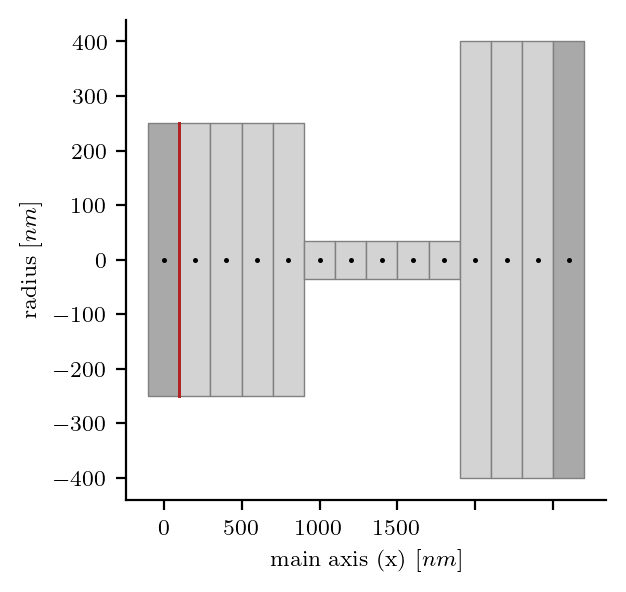

In [4]:
reload(plot)
fig = plt.figure(dpi=200, figsize=(3,3))
pos = [0.1,0.1,0.8,0.8]
plot.x_grid_on_spine(fig, pos, x_sim,a_sim)

(-0.4, 0.4)

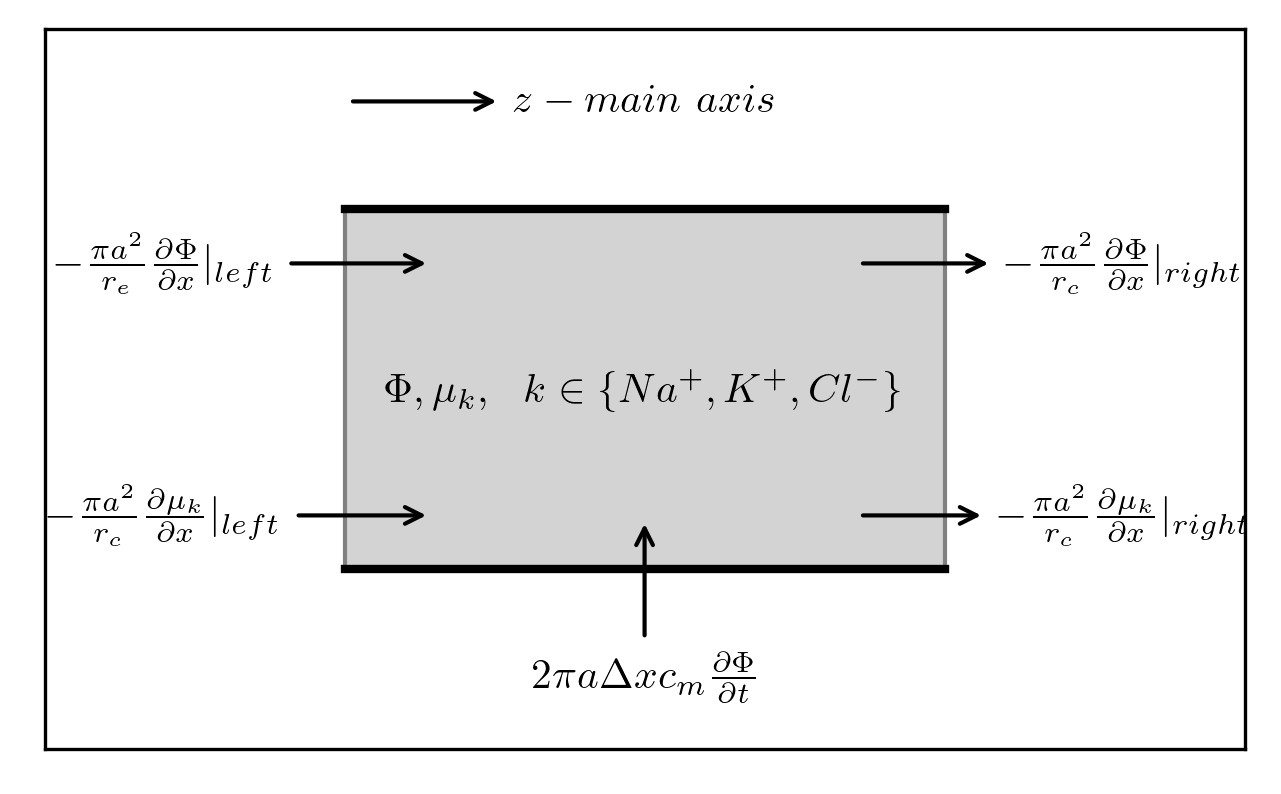

In [5]:




fig = plt.figure(facecolor='white', dpi=300, figsize=(5,3))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax.set_xticks([])
ax.set_yticks([])


l = 0.6
h = 0.4

ax.fill_between([-l/2., l/2.],[-h/2.,-h/2.], [h/2., h/2.], facecolor='lightgrey', edgecolor='gray')
ax.plot([-l/2., l/2.],[-h/2.,-h/2.], 'k-', lw=2.)
ax.plot([-l/2., l/2.],[h/2.,h/2.], 'k-', lw=2.)


ax.annotate(r"$-\frac{\pi a^2}{r_c}\frac{\partial \mu_k}{\partial x }|_{left}$", 
            xy=(-l/2*0.7, -h/2*0.7), xytext=(-l*0.8, -h/2.*0.7), arrowprops=dict(arrowstyle="->"), ha='center', va='center')

ax.annotate(r"$-\frac{\pi a^2}{r_e}\frac{\partial \Phi}{\partial x }|_{left}$", 
            xy=(-l/2*0.7, h/2*0.7), xytext=(-l*0.8, h/2.*0.7), arrowprops=dict(arrowstyle="->"), ha='center', va='center')

ax.annotate(r"$-\frac{\pi a^2}{r_c}\frac{\partial \Phi}{\partial x }|_{right}$", 
            xy=(l/2*0.7, h/2*0.7), xytext=(l*0.8, h/2.*0.7), arrowprops=dict(arrowstyle="<-"), ha='center', va='center')

ax.annotate(r"$-\frac{\pi a^2}{r_c}\frac{\partial \mu_k}{\partial x }|_{right}$", 
            xy=(l/2*0.7, -h/2*0.7), xytext=(l*0.8, -h/2.*0.7), arrowprops=dict(arrowstyle="<-"), ha='center', va='center')

ax.annotate(r"$2 \pi a \Delta x c_m \frac{\partial \Phi}{\partial t }$", 
            xy=(0., -h/2.*0.7), xytext=(0., -0.8*h), arrowprops=dict(arrowstyle="->"), ha='center', va='center')

#ax.annotate(r"$2 \pi a \Delta x ~ i_{AMPA}$",
#            xy=(0., h/2.*0.7), xytext=(0., 0.8*h), arrowprops=dict(arrowstyle="->"), ha='center', va='center')

ax.annotate(r"$z - main~axis$",
            xy=(-0.3, 0.8*h), xytext=(0., 0.8*h), arrowprops=dict(arrowstyle="<-"), ha='center', va='center')

ax.text(0., 0., '$\Phi, \mu_k, ~~k \in \{{Na^+},{K^+},{Cl^{-}}\}$', va='center', ha='center')

ax.set_xlim([-l,l])
ax.set_ylim([-h,h])


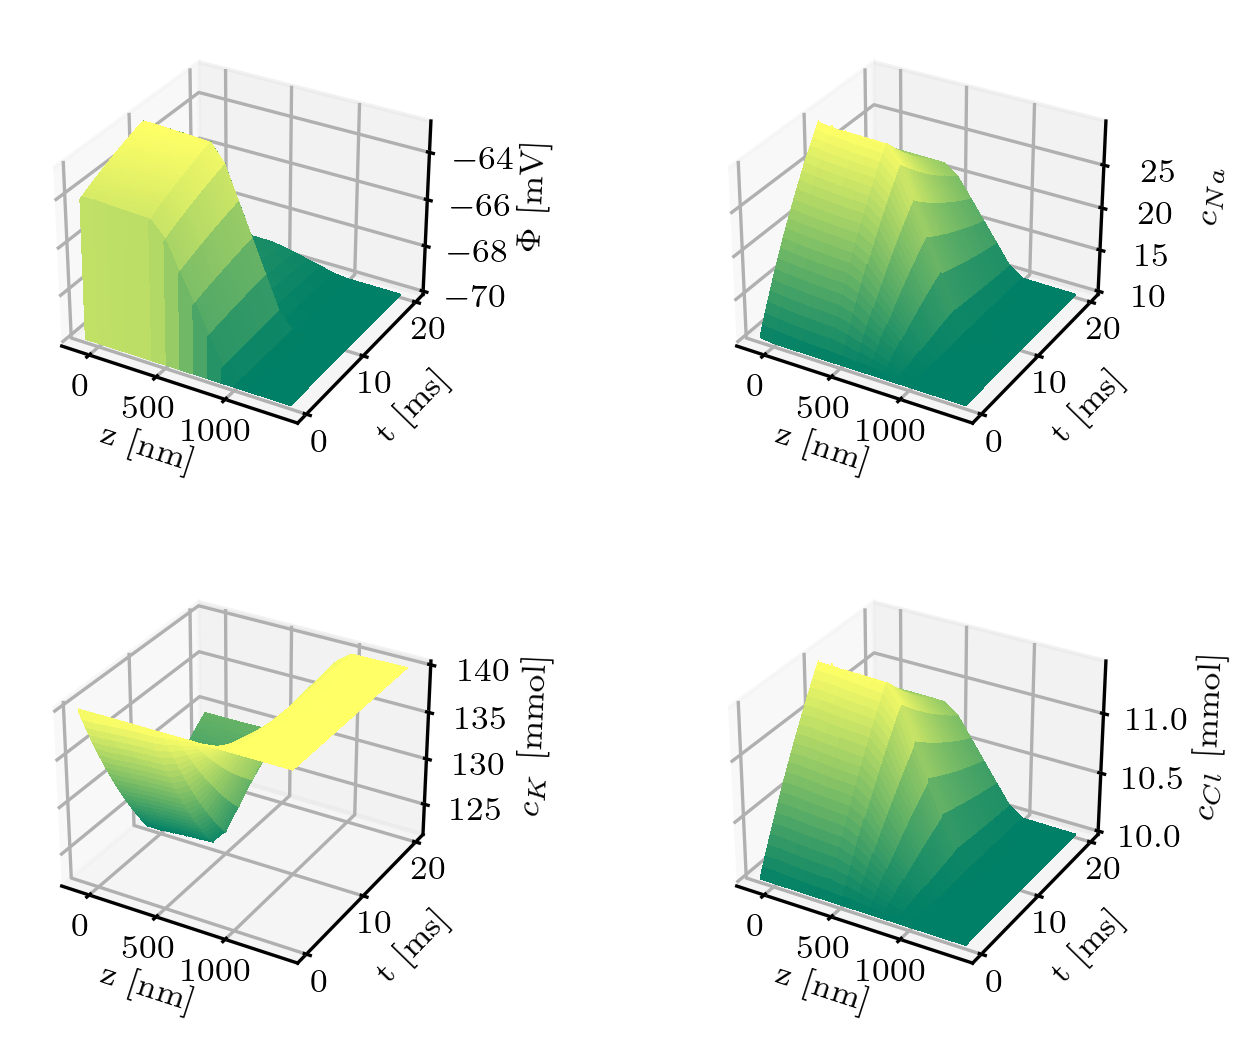

In [6]:
reload(plot)
file_id = 'experiment_1'
plot.figure_space_time_summary(file_id)
#plt.title(file_id)
plt.show()

# Figure 01

In [25]:
(
    x,
    a,
    t,
    phi,
    c_Na,
    c_K,
    c_Cl,
    param_set,
    params,
    dx,
    dt,
    r_Na,
    R_Na,
    g_Na_ij,
    r_K,
    R_K,
    g_K_ij,
    r_Cl,
    R_Cl,
    g_Cl_ij,
    r_e,
    R_e,
    g_ij,
    i_c_Na,
    i_c_K,
    i_c_Cl,
    i_e_Na,
    i_e_K,
    i_e_Cl,
    i_e,
    i_c,
    i_total,
    ) = plot.get_results_summary('experiment_1')

params

{'const_k_B': 1.381e-23,
 'const_e': 1.602e-19,
 'const_N_A': 6.022e+23,
 'const_z_Na': 1,
 'const_z_K': 1,
 'const_z_Cl': -1,
 'const_z_background': -1,
 'const_D_Na': 6.5e-10,
 'const_D_K': 1e-09,
 'const_D_Cl': 1e-09,
 'const_r_m_Na': 1.0,
 'const_r_m_K': 1.0,
 'const_r_m_Cl': 1.0,
 'const_c_m': 0.01,
 'const_T': 310.0,
 'const_phi_rest': -0.07,
 'const_c_Na_extracell': 145.0,
 'const_c_K_extracell': 5.0,
 'const_c_Cl_extracell': 110.0,
 'const_c_Na_rest': 10.0,
 'const_c_K_rest': 140.0,
 'const_c_Cl_rest': 10.0,
 'const_driving_voltage': 0.1}

In [50]:
# theoretically estimate neck resistance
print('x', x,)
print('a', a,a[6:11])
dx = x[1] - x[0]
a_neck = a[7]
l_neck = x[11] - x[6]
l_head = x[6] 
a_head = a[1]
e = params['const_e']
D_Na, D_K, D_Cl = params['const_D_Na'], params['const_D_K'], params['const_D_Cl']
z_Na, z_K, z_Cl = params['const_z_Na'], params['const_z_K'], params['const_z_Cl']
n_Na, n_K, n_Cl = params['const_c_Na_rest'], params['const_c_K_rest'], params['const_c_Cl_rest']
k_B = params['const_k_B']
T = params['const_T']
N_A = params['const_N_A']
R_neck = k_B * T / e**2 / N_A / (D_Na * z_Na**2 *c_Na[0,7] + D_K * z_K**2 *c_K[0,7] + D_Cl * z_Cl**2 *c_Cl[0,7]) * l_neck / np.pi / a_neck**2
R_head = k_B * T / e**2 / N_A / (D_Na * z_Na**2 *c_Na[0,1] + D_K * z_K**2 *c_K[0,1] + D_Cl * z_Cl**2 *c_Cl[0,1]) * l_head / np.pi / a_head**2
C_head = params['const_c_m'] * l_head * 2. * np.pi * a_head #capacitance
print('R_Neck',R_neck/1.e6, 'MOhm')
print('neck length: ', l_neck * 1.e9, 'nm')
print('r_neck', a_neck*1.e9, 'nm')
print('head volume', a[0]**2 * np.pi * l_neck * 1.e18, 'mum^3')

x [-1.0e-07  0.0e+00  1.0e-07  2.0e-07  3.0e-07  4.0e-07  5.0e-07  6.0e-07
  7.0e-07  8.0e-07  9.0e-07  1.0e-06  1.1e-06  1.2e-06  1.3e-06  1.4e-06]
a [2.5e-07 2.5e-07 2.5e-07 2.5e-07 2.5e-07 2.5e-07 3.5e-08 3.5e-08 3.5e-08
 3.5e-08 3.5e-08 4.0e-07 4.0e-07 4.0e-07 4.0e-07 4.0e-07] [3.5e-08 3.5e-08 3.5e-08 3.5e-08 3.5e-08]
R_Neck 229.9637059247888 MOhm
neck length:  500.00000000000006 nm
r_neck 35.0 nm
head volume 0.09817477042468105 mum^3


In [51]:
# theoretically estimate time constant of head capacitor
C_head * R_head

3.540016216715442e-08

In [78]:
tau = l_head * np.pi * a_head**2 * l_neck / a_neck**2 / np.pi / D_Na
tau

0.0196232339089482

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


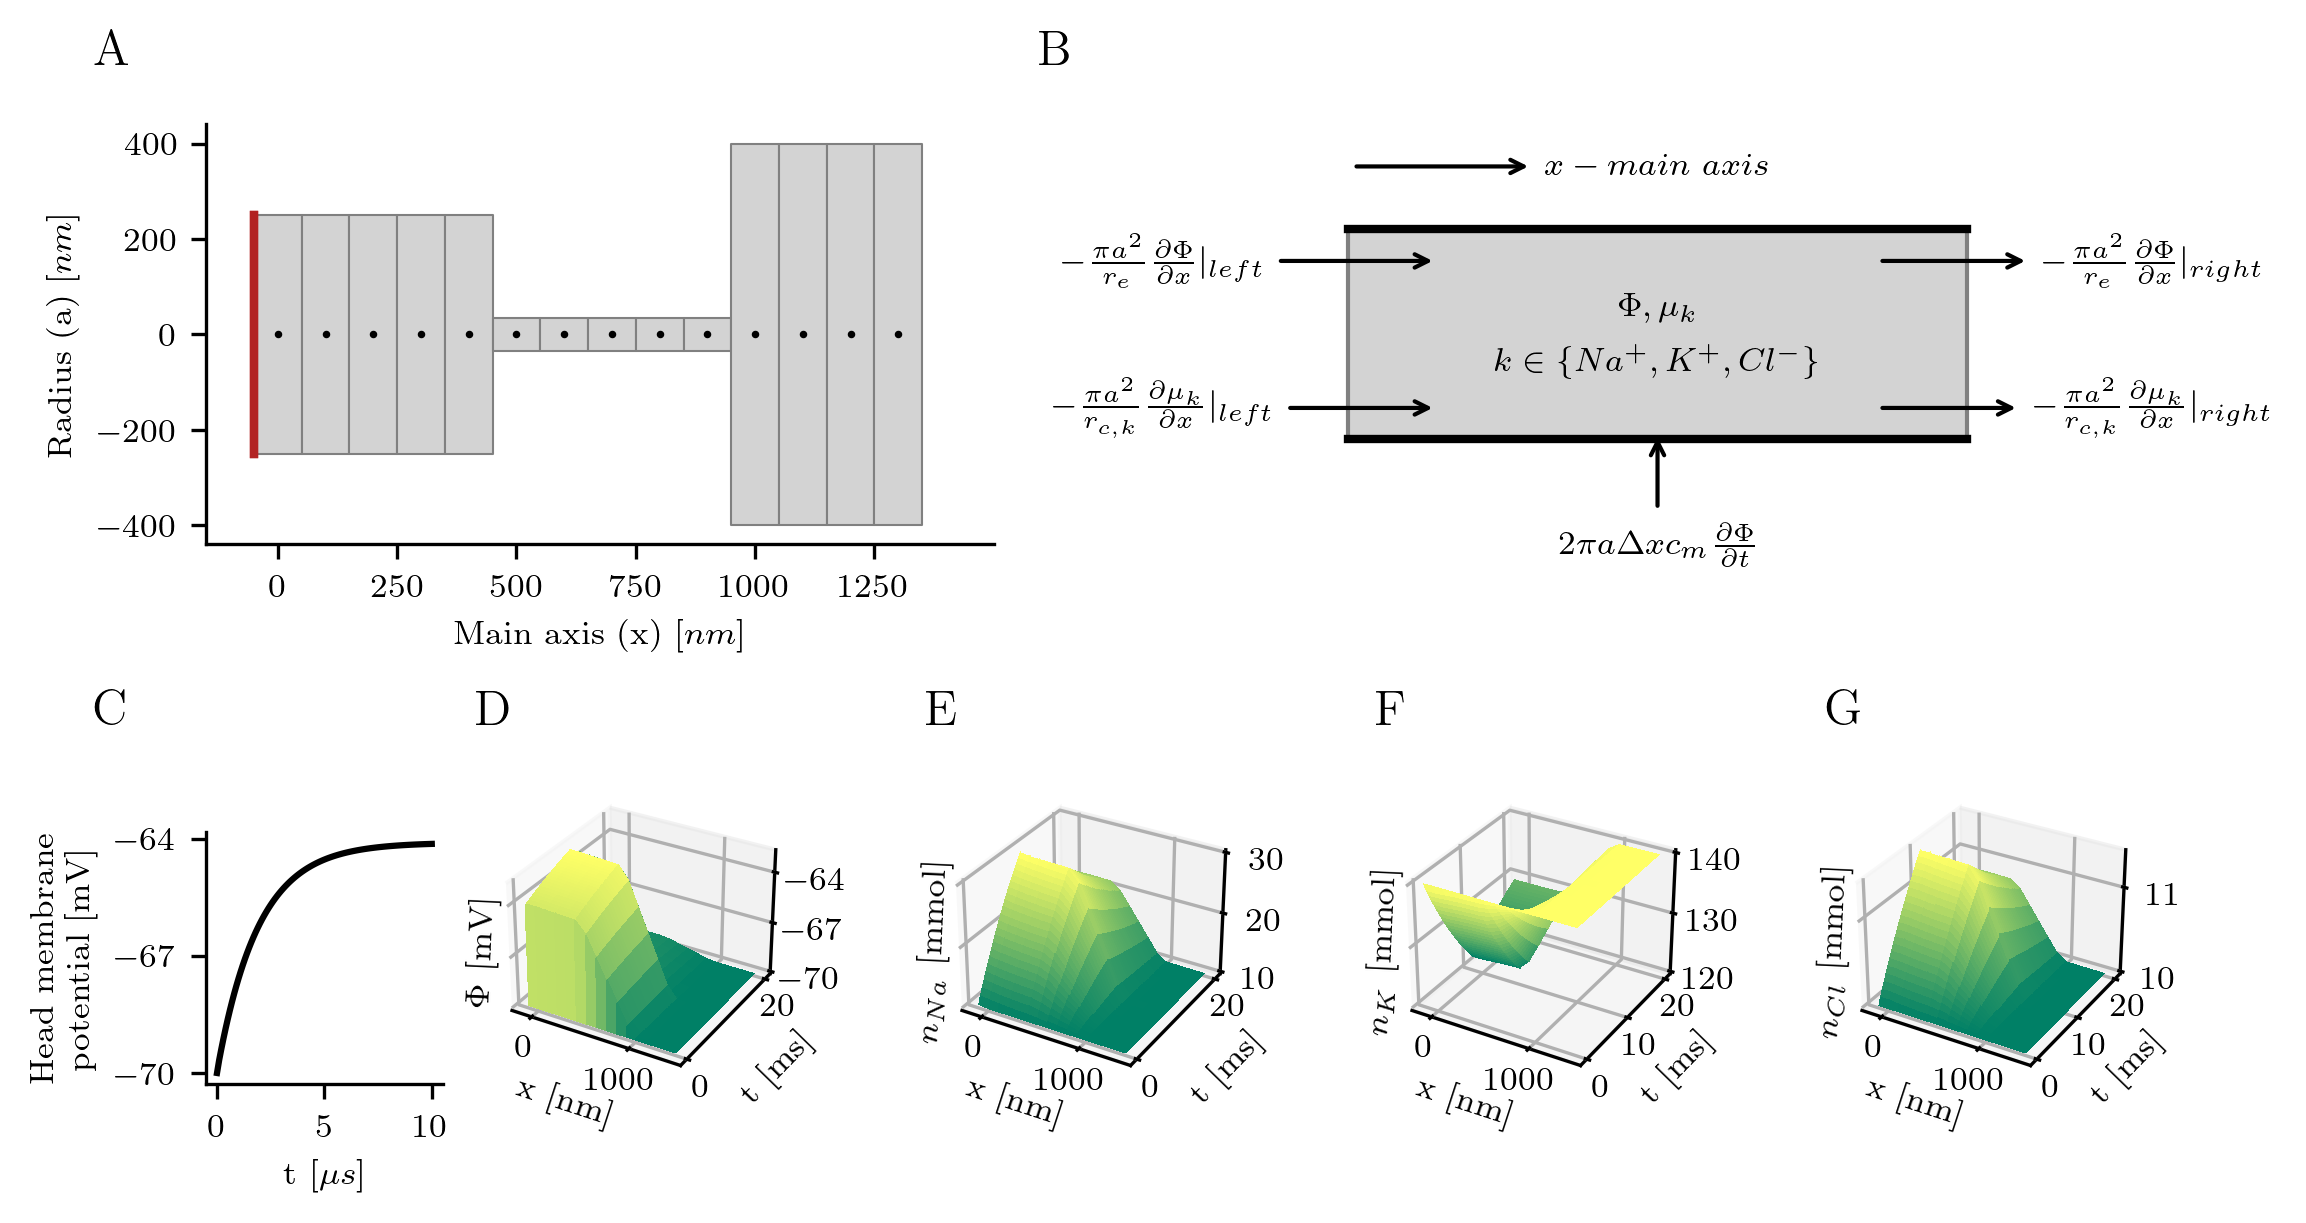

In [40]:
reload(plot)


# Finite Difference Domain
pos1 = [0.08,0.55,0.35,0.35]


# Extended Cable Equations
pos2 = [0.45, 0.55, 0.55,0.35]



  
wx, wy = 0.145, 0.25
pos3 = [0.08, 0.1, wx-0.04, wy-0.04]
pos4 = [0.2, 0.1, wx, wy]
pos5 = [0.4, 0.1, wx, wy]
pos6 = [0.6, 0.1, wx, wy]
pos7 = [0.8, 0.1, wx, wy]

fig = plt.figure(dpi=300, figsize=(7.5,4))

(
    x,
    a,
    t,
    phi,
    c_Na,
    c_K,
    c_Cl,
    param_set,
    params,
    dx,
    dt,
    r_Na,
    R_Na,
    g_Na_ij,
    r_K,
    R_K,
    g_K_ij,
    r_Cl,
    R_Cl,
    g_Cl_ij,
    r_e,
    R_e,
    g_ij,
    i_c_Na,
    i_c_K,
    i_c_Cl,
    i_e_Na,
    i_e_K,
    i_e_Cl,
    i_e,
    i_c,
    i_total,
    ) = plot.get_results_summary('experiment_1')

def ax_cap_charge_head(fig, pos, file_id):
    (
    x,
    a,
    t,
    phi,
    c_Na,
    c_K,
    c_Cl,
    param_set,
    params,
    dx,
    dt,
    r_Na,
    R_Na,
    g_Na_ij,
    r_K,
    R_K,
    g_K_ij,
    r_Cl,
    R_Cl,
    g_Cl_ij,
    r_e,
    R_e,
    g_ij,
    i_c_Na,
    i_c_K,
    i_c_Cl,
    i_e_Na,
    i_e_K,
    i_e_Cl,
    i_e,
    i_c,
    i_total,
    ) = plot.get_results_summary(file_id)
    ax = fig.add_axes(pos)
    ax.plot(t*1.e6, phi[:,1]*1.e3, 'k-')
    ax.set_ylabel('Head membrane \npotential [mV]', fontsize=8)
    ax.set_yticks([-70,-67,-64])
    ax.set_xticks([0,5,10])
    ax.set_xlabel('t [$\mu s]$', fontsize=8)
    ax.tick_params(labelsize=8)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    

# Simulation Results
xx, tt = np.meshgrid(x,t)

plot.x_grid_on_spine(fig, pos1, x,a, show_boundary=False)
plot.ax_extended_cable(fig, pos2)
ax_cap_charge_head(fig, pos3, 'experiment_10')
plot.ax_surface(fig, pos4, xx, tt, phi, z_label=r'$\Phi$ [mV]', layout='Phi', z_ticks=(-70,-67,-64))
plot.ax_surface(fig, pos5, xx, tt, c_Na, z_label=r'$n_{Na}$ [mmol]', z_ticks=(10,20,30))
plot.ax_surface(fig, pos6, xx, tt, c_K, z_label=r'$n_K$ [mmol]', z_ticks=(120,130,140))
plot.ax_surface(fig, pos7, xx, tt, c_Cl, z_label=r'$n_{Cl}$ [mmol]', z_ticks=(10,11))

fig.text(0.03, 0.95,'A',  fontsize=12)
fig.text(0.45, 0.95,'B',  fontsize=12)
fig.text(0.03, 0.4,'C',  fontsize=12)
fig.text(0.2, 0.4,'D',  fontsize=12)
fig.text(0.4, 0.4,'E',  fontsize=12)
fig.text(0.6, 0.4,'F',  fontsize=12)
fig.text(0.8, 0.4,'G',  fontsize=12)

plt.savefig('./../../../PaperSpineElectrodiffusion/figures/cable/Figure01.eps')
plt.savefig('./../../../PaperSpineElectrodiffusion/figures/cable/Figure01.png')
plt.savefig('./../../../PaperSpineElectrodiffusion/figures/cable/Figure01.tif')
plt.show()

# FIgure 1
    A) Spine model with parameters found in Cornejo et al. 2022
    B) Extended cable model distinguishes between different ion-species and diffusive and electric currents.
    C) Membrane potential 10 \mu s shows charging of membrane capacitor.  TODO
    D-G) 25 pA input current of sodium ions for 10 ms.
 

## Estimate decay time constant

0.01915

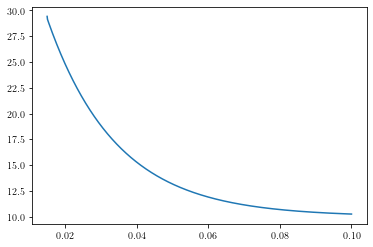

In [62]:
(
    x,
    a,
    t,
    phi,
    c_Na,
    c_K,
    c_Cl,
    param_set,
    params,
    dx,
    dt,
    r_Na,
    R_Na,
    g_Na_ij,
    r_K,
    R_K,
    g_K_ij,
    r_Cl,
    R_Cl,
    g_Cl_ij,
    r_e,
    R_e,
    g_ij,
    i_c_Na,
    i_c_K,
    i_c_Cl,
    i_e_Na,
    i_e_K,
    i_e_Cl,
    i_e,
    i_c,
    i_total,
    ) = plot.get_results_summary('experiment_4')

ti_min =300
plt.plot(t[ti_min:],c_Na[ti_min:,1])

c_decay = (c_Na[ti_min, 1] - 10) / np.e + 10
c_decay
#np.where(np.logical_and(c_Na[:,1] > c_decay, t>15.e-3))
t_decay = np.min(np.where(c_Na[ti_min:,1]<c_decay)) * dt
t_decay

In [76]:
phi[1,1], phi[200,1], phi[201,1]

(-0.0640933333782083, -0.06284678880836284, -0.06883558640618453)

In [72]:
c_Na[200,1]/c_Na[1,1], c_Na[400,1]

(2.8553047521384616, 21.441698146174755)

In [67]:
c_Cl[200,1]

11.399771577110249

In [68]:
c_K[200,1]

121.98492693672905